In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# 한글설정
from matplotlib import font_manager
f_path = '/Library/Fonts/NanumGothic.ttf'
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = 'NanumGothic')

# #지수표현 안나오게 하기
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.float_format', None)

import folium
from folium.plugins import MarkerCluster, MiniMap

In [2]:
df = pd.read_csv('./df3.csv')

In [3]:
df_temp = df.copy()

In [4]:
df_group = df.groupby('Type').mean().sort_values('dis/tot', ascending = False)
df_group.reset_index(inplace=True)
df_group.head()

,Type,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,dis/tot,count
0,정보서비스,253076.500000,77719.250000,202007.000000,282050.000000,6250.000000,1.000000,0.250000,126.488870,33.498955,0.250000,1.0
1,유류판매,189897.296474,110626.006410,202006.014423,798033.383013,122833.591346,2.600962,0.625000,126.532433,33.463106,0.220513,1.0
2,미곡상,159497.038509,117861.423602,202006.401242,196780.409938,21388.211180,1.972671,0.316770,126.491174,33.450103,0.158758,1.0
3,인삼제품,126856.267857,108761.125000,202006.321429,107526.785714,10708.214286,1.250000,0.250000,126.443240,33.477219,0.157143,1.0
4,기타직물,188446.904762,119548.976190,202006.547619,144833.571429,17202.619048,1.404762,0.190476,126.546419,33.377545,0.152381,1.0


<AxesSubplot:xlabel='Type', ylabel='dis/tot'>

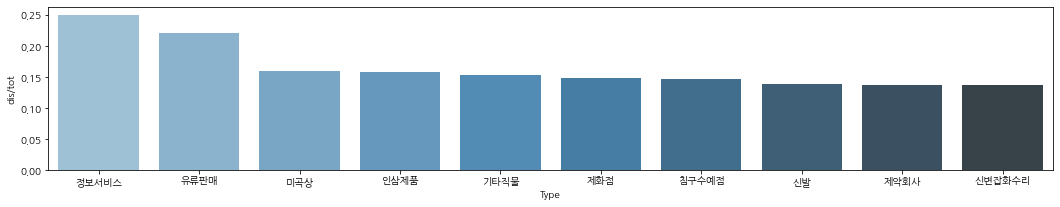

In [5]:
# 총사용금액대비 재닌금액 사용 비율이 높은 업종
plt.figure(figsize=(18,3))
sns.barplot(x='Type', y ='dis/tot', data=df_group[:10],palette = 'Blues_d')

In [6]:
df_dong = df.groupby('dong').mean().sort_values('dis/tot', ascending = False)
df_dong.reset_index(inplace=True)

In [7]:
df_temp = df_temp[['dong', 'lon', 'lat']]
df_temp.drop_duplicates('dong',keep="first", inplace=True)
df_temp

,dong,lon,lat
0,서귀동,126.565191,33.250120
1,이도이동,126.548806,33.494262
2,아라일동,126.545977,33.470337
3,강정동,126.502376,33.252536
4,건입동,126.551876,33.503765
...,...,...,...
3903,보목동,126.602398,33.238371
6590,회천동,126.603043,33.500745
7850,삼양삼동,126.575717,33.526580
10611,용강동,126.586746,33.477119


In [8]:
df_dong = df_dong.merge(df_temp, on = 'dong')
df_dong

,dong,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon_x,lat_x,dis/tot,count,lon_y,lat_y
0,추자면,136566.181406,129797.279289,202006.507937,3.276474e+05,44833.170824,10.342782,1.318216,126.300494,33.959549,0.123810,1.0,126.294264,33.961156
1,이도일동,133804.509826,136368.381851,202006.489440,4.636255e+05,30226.414547,14.964843,1.006090,126.526520,33.506813,0.082374,1.0,126.524301,33.511554
2,일도일동,136139.405602,145775.420030,202006.489638,6.674850e+05,66290.334556,16.792811,1.268121,126.526472,33.513240,0.081358,1.0,126.531273,33.512989
3,동홍동,171699.622488,147908.351203,202006.494837,5.768435e+05,43416.712291,17.451258,1.451075,126.570419,33.256656,0.080283,1.0,126.572164,33.250200
4,용담일동,132768.483644,136947.266293,202006.491508,4.210442e+05,28915.083661,11.858697,0.869907,126.514723,33.507089,0.080097,1.0,126.515224,33.507388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,도두이동,165108.171669,135537.926277,202006.511322,8.276416e+05,13311.661401,22.272249,0.696682,126.482179,33.505072,0.031122,1.0,126.476987,33.509178
69,회천동,195832.092025,134120.921779,202006.509202,1.745480e+06,27236.756135,31.319018,0.539877,126.625760,33.475506,0.030982,1.0,126.603043,33.500745
70,색달동,127516.411615,134732.937634,202006.525617,1.775211e+06,19709.553246,29.587849,0.643374,126.411563,33.254827,0.021969,1.0,126.416956,33.258691
71,우도면,216794.823802,133690.994333,202006.571012,3.010512e+05,3061.796668,14.682638,0.132921,126.953580,33.507024,0.014821,1.0,126.953131,33.518169


In [9]:
# 제주도 전체 총사용금액대비 재난금액사용율 주소별 지도 시각화

from IPython.display import display
m = folium.Map((33.36803264767669, 126.53430319100599), zoom_start= 10)
for n in df_dong.index:
    folium.CircleMarker([df_dong['lat_x'][n], df_dong['lon_x'][n]], radius = int(df_dong['dis/tot'][n]*250)
    , color='red', fill="True", fill_color='red', popup=df_dong['dong'][n] + ":" + str(df_dong['dis/tot'][n])).add_to(m)
display(m)

In [10]:
df[(df['dong'] =='영남동') & (df['NumofDisSpent'] >0)]

,Unnamed: 0,OBJECTID,YM,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,lon_lat,dong,Time_cut,category,dis/tot,count
190325,196796,196462,202007,서귀포시,중소2,기타숙박업,18,901038,78999,18,1,126.496394,33.288528,126.4963943132902_33.28852757846805,영남동,저녁,여행/숙박,0.1,1
233089,49061,138369,202005,서귀포시,중소2,기타숙박업,15,514696,20000,10,1,126.496394,33.288528,126.4963943132902_33.28852757846805,영남동,오후,여행/숙박,0.0,1
233125,49066,232020,202005,서귀포시,중소2,기타숙박업,20,755506,17000,30,1,126.496394,33.288528,126.4963943132902_33.28852757846805,영남동,저녁,여행/숙박,0.0,1


In [11]:
df_dong['dong'].unique()

array(['추자면', '이도일동', '일도일동', '동홍동', '용담일동', '오라일동', '도남동', '남원읍', '화북일동',
       '일도이동', '삼양이동', '외도일동', '삼도일동', '도련일동', '도련이동', '보목동', '신효동',
       '내도동', '서호동', '서홍동', '토평동', '서귀동', '삼도이동', '아라이동', '노형동', '삼양일동',
       '표선면', '용담이동', '하효동', '이도이동', '강정동', '대정읍', '법환동', '아라일동', '화북이동',
       '월평동', '중문동', '오라이동', '건입동', '호근동', '봉개동', '오라삼동', '도평동', '이호이동',
       '상효동', '연동', '한림읍', '한경면', '도두일동', '외도이동', '하원동', '도순동', '오등동',
       '조천읍', '애월읍', '영평동', '용강동', '회수동', '대포동', '해안동', '하예동', '성산읍',
       '안덕면', '삼양삼동', '상예동', '이호일동', '구좌읍', '용담삼동', '도두이동', '회천동', '색달동',
       '우도면', '영남동'], dtype=object)

In [12]:
df_nw = df[df['dong'].str.contains('남원')]
df_ps = df[df['dong'].str.contains('표선')]
df_ss = df[df['dong'].str.contains('성산')]

In [13]:
len(df_nw), len(df_ps), len(df_ss)

(20669, 22835, 35123)

In [14]:
df_nw_group = df_nw.groupby('Type').mean().sort_values('dis/tot', ascending = False)
df_nw_group.reset_index(inplace=True)
df_nw_group.head(5)

,Type,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,dis/tot,count
0,주방용구,226499.000000,39275.000000,202005.000000,600000.000000,600000.000000,1.000000,1.000000,126.620986,33.284561,1.000000,1.0
1,종합용역,273195.333333,134592.666667,202006.666667,116333.333333,47666.666667,1.000000,0.333333,126.617494,33.290231,0.333333,1.0
2,침구수예점,224717.521739,160691.630435,202006.326087,87365.434783,30433.478261,1.304348,0.391304,126.716249,33.278064,0.313043,1.0
3,신발,125741.625000,152751.125000,202006.250000,24541.666667,4708.333333,1.208333,0.291667,126.719295,33.278850,0.229167,1.0
4,안경,125439.285714,142561.392857,202006.392857,174535.714286,27142.857143,1.535714,0.357143,126.718751,33.279295,0.221429,1.0


<AxesSubplot:xlabel='Type', ylabel='dis/tot'>

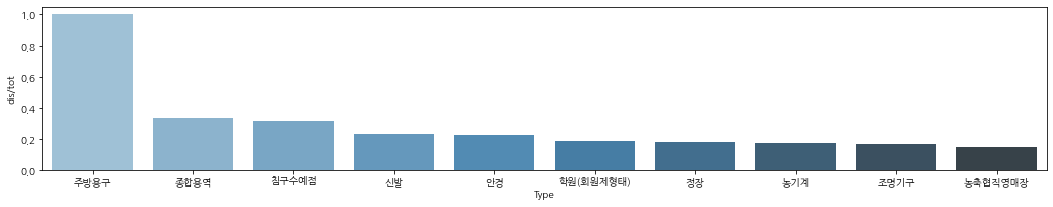

In [15]:
#남원읍 총사용금액대비 재난지원금 사용이 높은 업종
plt.figure(figsize=(18,3))
sns.barplot(x='Type', y ='dis/tot', data=df_nw_group[:10],palette = 'Blues_d')

In [16]:
df_ps_group = df_ps.groupby('Type').mean().sort_values('dis/tot', ascending = False)
df_ps_group.reset_index(inplace=True)
df_ps_group.head(5)

,Type,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,dis/tot,count
0,의료용품,126857.384615,163642.538462,202005.923077,252000.000000,73000.000000,1.538462,0.692308,126.829244,33.325015,0.384615,1.0
1,비료농약사료종자,200992.888889,98666.074074,202006.037037,201374.074074,50465.555556,1.888889,0.629630,126.830129,33.321316,0.311111,1.0
2,사우나,127264.307692,51260.076923,202006.076923,125384.615385,20769.230769,1.384615,0.230769,126.831410,33.323683,0.230769,1.0
3,신발,127929.769231,142522.564103,202006.384615,61846.153846,15751.538462,2.692308,0.512821,126.832466,33.325045,0.228205,1.0
4,홍삼제품,128488.243902,144506.073171,202006.487805,527245.512195,114047.317073,2.536585,0.658537,126.832997,33.325501,0.212195,1.0


<AxesSubplot:xlabel='Type', ylabel='dis/tot'>

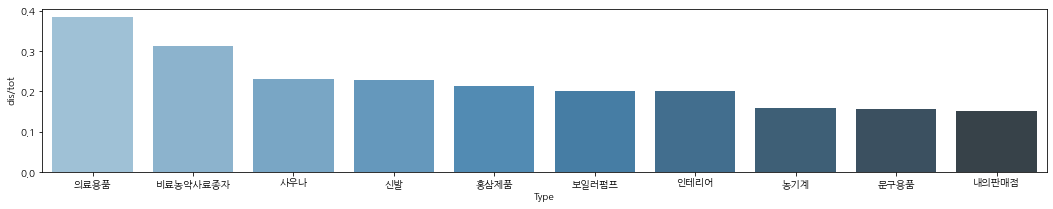

In [17]:
#표선면 총사용금액대비 재난지원금 사용이 높은 업종
plt.figure(figsize=(18,3))
sns.barplot(x='Type', y ='dis/tot', data=df_ps_group[:10],palette = 'Blues_d')

In [18]:
# 성산읍에서 그룹바이해서 이것저것 탐색
df_ss_group = df_ss.groupby('Type').sum().sort_values('dis/tot', ascending = False)
df_ss_group.reset_index(inplace=True)
df_ss_group.head(5)

,Type,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,dis/tot,count
0,일반한식,2312374391,1790278804,2367516527,4554157235,121164044,112602,3400,1.487403e+06,391960.089183,439.2,11720
1,편의점,477899780,436216615,671065693,1288044238,42359282,151589,4270,4.216022e+05,111094.588796,108.2,3322
2,서양음식,728466529,511792625,690054390,672378960,13816797,42752,879,4.335100e+05,114218.309261,87.4,3416
3,슈퍼마켓,184168521,163562169,240387748,1684920101,108757870,57528,4233,1.510221e+05,39790.759683,73.3,1190
4,농축수산품,329369035,227146260,314120188,555953731,17357250,8337,236,1.973327e+05,51993.846603,36.5,1555


<AxesSubplot:xlabel='Type', ylabel='dis/tot'>

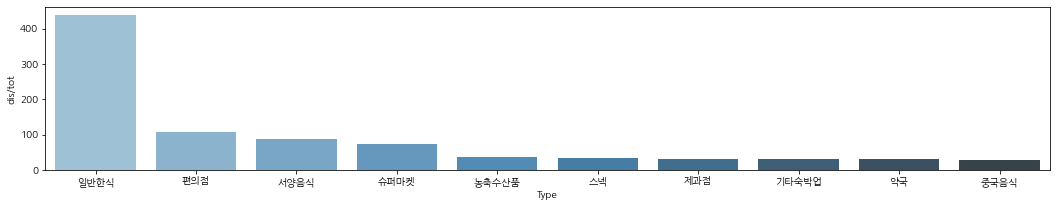

In [19]:
#성산읍 총사용금액대비 재난지원금 사용이 높은 업종
plt.figure(figsize=(18,3))
sns.barplot(x='Type', y ='dis/tot', data=df_ss_group[:10],palette = 'Blues_d')

In [20]:
df.head()

,Unnamed: 0,OBJECTID,YM,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,lon_lat,dong,Time_cut,category,dis/tot,count
0,111401,164793,202006,서귀포시,중소,침구수예점,16,18000,170000,3,1,126.565191,33.250120,126.56519070778894_33.25011994226535,서귀동,오후,생활/기타,9.4,1
1,100133,104496,202006,제주시,중소1,일반한식,13,3800,33000,7,4,126.548806,33.494262,126.54880591248356_33.49426212048044,이도이동,점심,외식/주점,8.7,1
2,222672,236750,202005,제주시,영세,독서실,20,15000,90000,1,1,126.545977,33.470337,126.54597714099869_33.47033714962093,아라일동,저녁,교육/육아,6.0,1
3,52817,79865,202005,서귀포시,일반,헬스크럽,12,100000,600000,1,1,126.502376,33.252536,126.50237587126347_33.252535695573414,강정동,점심,레저/스포츠,6.0,1
4,204263,202431,202006,제주시,중소2,자동차시트타이어,18,42000,177000,3,1,126.551876,33.503765,126.55187603434769_33.50376456809342,건입동,저녁,주유/자동차,4.2,1


In [21]:
# 영세업을 위주로 찾아보기
df_small = df[df['FranClass'] =='영세']
df_small.groupby('Type').mean().sort_values('dis/tot', ascending = False).head(60)

,Unnamed: 0,OBJECTID,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,dis/tot,count
Type,,,,,,,,,,,
정보서비스,253076.500000,77719.250000,202007.000000,2.820500e+05,6250.000000,1.000000,0.250000,126.488870,33.498955,0.250000,1.0
유류판매,198121.385827,113784.960630,202005.811024,3.746678e+05,87460.496063,1.582677,0.456693,126.523892,33.453935,0.232283,1.0
기타직물,168725.515152,124146.272727,202006.242424,1.643939e+05,21894.242424,1.484848,0.242424,126.534045,33.394921,0.193939,1.0
미곡상,139904.910112,126149.328652,202006.376404,1.398000e+05,17291.994382,1.727528,0.292135,126.523722,33.459797,0.176124,1.0
제화점,91888.696429,151130.059524,202006.380952,1.794467e+05,32633.988095,1.696429,0.285714,126.557790,33.476665,0.158929,1.0
홍삼제품,95508.884615,136061.336538,202006.384615,3.788229e+05,73955.384615,2.009615,0.384615,126.620630,33.386432,0.153846,1.0
침구수예점,160839.720535,143228.580546,202006.393721,2.085831e+05,32419.357694,2.176531,0.319094,126.530106,33.432017,0.146011,1.0
주유소,130281.983740,122866.162602,202006.081301,1.298837e+06,112367.195122,32.000000,2.195122,126.506440,33.504507,0.144715,1.0
기타유통업,154272.760360,125725.187387,202006.511712,2.391615e+05,36455.066667,7.091892,0.909910,126.518708,33.550024,0.142162,1.0
